In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

from Configs import getEnvConfig, visualizeEnvConfig, getPredictorConfig, visualizePredictorConfig
from EnvLibs import PolicySimulator, createEnv
from DiffusionLibs import DiffusionPolicyInterface
from MdpSolverLibs import MdpKernel

In [2]:
configIdx = 0
envParams = getEnvConfig(configIdx)
visualizeEnvConfig(envParams)
predictorParams = getPredictorConfig(configIdx)
visualizePredictorConfig(predictorParams)
trafficDataParentPath = f'Results/TrafficData'
env = createEnv(envParams, trafficDataParentPath)
env.selectMode(mode="test", type="data")

Environment Configuration
Number of Users:        4
Window Length:          200
Dataflow:               thumb_fr
N_aggregation:          4
Resource Bar:           5
Bandwidth:              100
M List:                 [3, 4, 5]
Random Seed:            999
Alpha Range:            (0.01, 1.0)
Discrete Alpha Steps:   10
Predictor Configuration
Window Length:          200
Upsample K:             10
Dataflow:               thumb_fr
DB Parameter:           0.001
Alpha:                  0.01
Mode:                   fixed
Direction:              forward
Train Ratio:            0.6
Train Data Augment:     False
Smooth Fc:              1.5
Smooth Order:           3


In [3]:
num_windows = 1000
obvMode = "perfect" # "perfect" or "predicted"

# ==== Prepare DiffusionQ Policy====
diffusionQParams = {
    'device': 'cuda',
    'gamma': 0.99,
    'tau': 0.005,
    'lr': 5e-2,
    'eta': 1.0,
}
diffusionPolicyInterface = DiffusionPolicyInterface(envParams, **diffusionQParams)
#model_state_dict = torch.load(f'Results/DiffusionQ/diffusionQ_config{configIdx}.pth')
#diffusionPolicyInterface.diffusionQ.load_state_dict(model_state_dict)#
model_state_dict, info = diffusionPolicyInterface.trainOnline(
    env, epochs=100, windowPerEpoch=64, obvMode="predicted")

Epoch    0/ 100Avg. Packet Loss: 0.5707  Avg. Ld: 0.0000  Avg. Lq: -0.2597  Avg. loss_critic: 0.3785


Epoch   10/ 100Avg. Packet Loss: 0.5149  Avg. Ld: 0.0000  Avg. Lq: -0.4486  Avg. loss_critic: 0.0835


Epoch   20/ 100Avg. Packet Loss: 0.5115  Avg. Ld: 0.0000  Avg. Lq: -0.5122  Avg. loss_critic: 0.0459


ValueError: cannot convert float NaN to integer

In [4]:

torch.save(model_state_dict, f'Results/DiffusionQ/diffusionQ_online_config{configIdx}.pth')
print(f"Model saved to Results/DiffusionQ/diffusionQ_online_config{configIdx}.pth")

Model saved to Results/DiffusionQ/diffusionQ_online_config0.pth


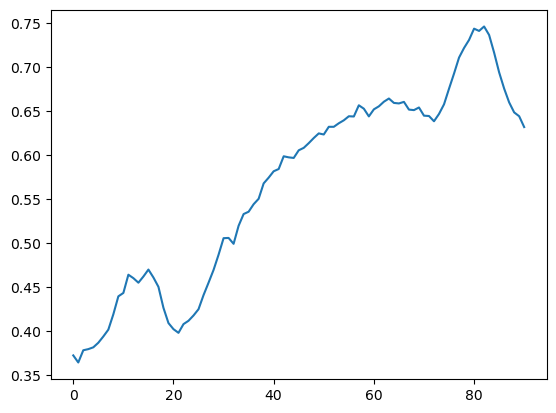

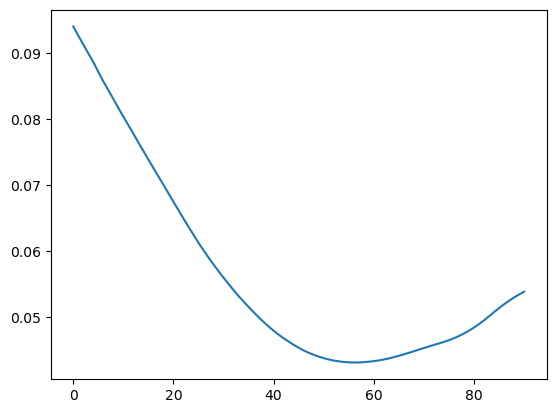

In [ ]:
def smooth(x, window_size=10):  
    return np.convolve(x, np.ones(window_size)/window_size, mode='valid')

plt.plot(smooth(info['rewardRecord']))
plt.show()
plt.plot(smooth(info['LqRecord']))
plt.show()